## Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек
Выполнил студент гр. 9303 Ефимов Максим, вариант 6
## Цель работы
Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.
## Основные теоретические сведения
#### Бинарный метод
Бинарный метод - это один из алгоритмов быстрого возведения числа $x$ в некоторую степень $n\in \mathbb{N}$.

Алгоритм заключается в следующем: для начала числа $x$ представляется в двоичном виде, после чего из этого двоичного представления удаляется старший бит (единица). Далее в цикле просматриваются биты от старшего к младшему: если бит 0, то текущее число умножается на себя, если бит 1 - то число умножается на себя и на $x$.

Количество операций, требуемых для возведения числа $x$ в степень $n$, для данного метода равно $l(n) = \lambda(n)+\nu(n)-1$, где $\lambda(n)=\lceil log_2(n) \rceil$, а $\nu(n)$ - вес Хэмминга(количеству единиц в двоичной записи числа $n$ ).

#### Метод множителей
Метод множителей это один из алгоритмов быстрого возведения числа $x$ в некоторую степень $n\in \mathbb{N}$.

Алгоритм заключается в следующем: для начала число $n$ раскладывается на множители ($n=i*j$), где $i$ - минимальный простой делитель числа $n$). Далее при помощи бинарного метода число &x& возводится в степень $i$, после чего полученный результат $x^i=y$ возводится в степень $j$: $y^j={(x^i)}^j=x^{i\cdot j}=x^n$. Если $n$ - простое число, то алгоритм сначала возводит число $x$ в степень $n-1$, а потом домножает на $x$, получая тем самым $x^n$.

Колличество умножений $l(m*n) = l(m)+l(n)$ 

#### Аддитивные цепочки

Аддитивная цепочка для некоторого числа $n\in \mathbb{N}$ - это последовательность натуральных чисел $\{a_i\}_{i=0}^m$, где $a_0 = 1$, $a_m = n$, в которой каждый последующий элемент является суммой каких-то двух предшествующих элементов.

$a_i = a_j + a_k, \forall i:1..m, k \leq j < i$
$l(n) = m$

Типы шагов в аддитивной цепочке:

Шаг $i$ называют удвоением, если $i - 1 = k = j$;

Шаг $i$ называют звездным, если $j = i - 1$, $k \in \{0, \dots, i-1\}$;

Шаг $i$ называют малым, если $\lambda(a_i)=\lambda(a_{i-1})$

Звездная цепочка - это аддитивная цепочка, в которая состоит только из звездных шагов.

### Алгоритм Яо
 
 Алгориитм Яо - алгоритм поиска аддитивной цепочки для n. Представим число n в виде: $ n = \sum_{i = 0}^{j}a_j2^{ik}, a_j \neq 0, k \geq 2 $ . Введём функцию $ d(z) $  - сумма чисел $ 2^{ik} $ для $  \forall i : a_i = z $ . В аддитивную цепочку последовательно добавляются следующие элементы:
 
 1. Степени двойки до $ \lambda (n) $ , т.е. в цепочки находятся элементы $ \{1,2,4,8,..., 2^{\lambda(n)} \} $.
 
 2. Значения функции $ d(z) $, $ z \in \{1, 2, 3, ..., 2^k-1\} $.
 
 3. Значения $ zd(z) $ , $ \forall z $.
 
Таким образом, $ n = \sum_{z = 1}^{2^k-1}zd(z) $.


#### Алгоритм дробления вектора индексов
Алгоритм дробления вектора индексов позволяет найти минимальную звездную цепочку для некоторого числа $n \in \mathbb{N}$.

Рассмотрим вектор индексов $\{r_i\}_{i=1}^q \cup {\{{\rho}_j \}}_{j=q+1}^m$, где ${\rho}_j= \{x: 1 \leq x \leq j \}$, ${\{r_i\}}_{i=1}^q$ - фиксированная часть, ${\{{\rho}_j\}}_{j=q+1}^m$ - изменяющаяся часть.

Наибольшее значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q} \cup \{q+1,q+2,\dots,m\}$.

Наименьшее значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q}\cup\{1,1,\dots,1\}$.

$a_{max} = a_{q+1} \cdot {2}^{m-q}$

$a_{min} = a_{q+1}+m-q$

Алгоритм:

1) Во внешнем цикле рассматриваем аддитивные цепочки длины $m$ от значения $\underline{l}(n)=\lceil log_2(n) \rceil$ до $\bar{l}(n)=\lambda(n)+\nu(n)-1$, на каждой итерации выбираем $q$ ($1 \leq q \leq m-1$), пусть $q = \frac{m}{2}$

2) Далее перебираем все возможные фиксированные части вектора индексов $\{r_i\}_{i=1}^q$ ($q!$ вариантов), для каждой строим соответствующую ей звездную цепочку, находим $a_{max}$ и ${a}_{min}$

&emsp; а) Если $a_m = n$ - конец

&emsp; б) Если $n \notin [a_{min},a_{max}]$, то переходим к следующему набору $\{r_i\}_{i=1}^q$

&emsp; в) Если $n\in [a_{min},a_{max}]$, то перебираем все возможные изменяющиеся части вектора индексов ${\left \{{\rho}_j \right \}}_{ j=q+1}^m$ и находим $a_m$. Если $a_m=n$, то цепочка найдена. Если все возможные изменяющиеся части вектора индексов ${\{{\rho}_j\}}_{j=q+1}^m$ исчерпаны, то переходим к следующему набору $\{r_i\}_{i=1}^q$.

3) Если все наборы вектора индексов длины $m$ исчерпаны, то увеличиваем $m$ на 1.

#### Теорема Брауэра
Пусть $k < log_2(log_2(n))$ верно: $l(n) < (1+k^{-1}) * \lceil log_2(n) \rceil + 2^{k-1} - k + 2$

Тогда $k=\lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$

Следствие 1: $\lim \limits_{n \to \infty} \frac{l(n)}{\lambda(n)} = 1$

Следствие 2: $\lambda(n)(1+\frac{1}{\lambda(\lambda(n))}+\frac{o(\lambda(\lambda(\lambda(n))))}{\lambda(\lambda(n))^2})$

#### Гипотеза Шольца-Брауэра
Пусть $l'(n)$ - кратчайшая длина аддитивной цепочки.

Тогда для любого $n \in \mathbb{N}$ верно: $l'(2^n-1)\leq l'(n)+n-1$

## Постановка задачи
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.
## Порядок выполнения работы
1. Применить бинарный метод и метод множителей для $x^n$, где $n\geq30$, для 2-3 значений n (значения n выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра k, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n>500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для $n=1..200$ путём построения функции $l(n)$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для $1<n\leq10$ на алгоритме дробления вектора индексов. Сделать выводы.
6. *Дополнительное необязательное задание*: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.

## Выполнение работы 
1.**Бинарный метод,метод множителей**

Приведем пример реализации бинарного метода.


In [32]:
import math
def binary_method(x,n):
    vector = []
    check = int(math.log(n, 2))
    count_of_multi = 0
    result = x
    binary_view = []
    while n:
        binary_view.append(n % 2)
        n //= 2
    binary_view.pop(-1)
    binary_view.reverse()
    check += binary_view.count(1)
    for item in binary_view:
        result *= result
        vector.append(result)
        count_of_multi += 1
        if item:
            result *= x
            vector.append(result)
            count_of_multi += 1
            
    print("Бинарный метод:Результат:", result,
          "\nКолличество умножений:", count_of_multi,
          "Проверка: ", check)
    return count_of_multi, result, vector

In [23]:

def multiplier_method(x, n):
    prime_factors = 2
    while n % prime_factors!= 0:
        prime_factors += 1
    print('Первое умножение')
    end = binary_method(x, prime_factors)
    count = end[0]
    print('Второе умножение')
    end = binary_method(end[1], n/prime_factors)
    count += end[0]

    print("Метод множителей:", end[1],
          "\nКолличество умножений:",  count )
    #8589934592

In [35]:
multiplier_method(2,15)

Первое умножение
Бинарный метод:Результат: 8 
Колличество умножений: 2 Проверка:  2
Второе умножение
Бинарный метод:Результат: 32768 
Колличество умножений: 3 Проверка:  3
Метод множителей: 32768 
Колличество умножений: 5


In [37]:
binary_method(2,15);

Бинарный метод:Результат: 32768 
Колличество умножений: 6 Проверка:  6


In [39]:
multiplier_method(3,33)

Первое умножение
Бинарный метод:Результат: 27 
Колличество умножений: 2 Проверка:  2
Второе умножение
Бинарный метод:Результат: 5559060566555523 
Колличество умножений: 5 Проверка:  5
Метод множителей: 5559060566555523 
Колличество умножений: 7


In [38]:
binary_method(3,33);

Бинарный метод:Результат: 5559060566555523 
Колличество умножений: 6 Проверка:  6


In [53]:
multiplier_method(5,35)


Первое умножение
Бинарный метод:Результат: 3125 
Колличество умножений: 3 Проверка:  3
Второе умножение
Бинарный метод:Результат: 2910383045673370361328125 
Колличество умножений: 4 Проверка:  4
Метод множителей: 2910383045673370361328125 
Колличество умножений: 7


In [99]:
binary_method(5,35);

Бинарный метод:Результат: 2910383045673370361328125 
Колличество умножений: 7 Проверка:  7


Уместно заметить, метод множителей не являясь самостоятельным, эксплуатирурет бинарный метод. Фактически, его функция сводится к разбиению на множители, следовательно успешность применения этого метода зависит от того,на сколько "удачно" разложится данное числа. Запишем результаты в таблицу.

| n |  Метод множителей  | Бинарный метод |
|:-:|:-:|:-:|
| 15 | 5 | 6 |
| 33 | 6  | 7 |
| 35 | 7 | 7 |


2. **Алгоритм ЯO**

Приведем реализция алгоритма Яо для нахождения аддитивной цепочки

In [162]:
def delete_repeat(l):
    n = []
    for i in l:
        if i not in n:
            n.append(i)
    return n

def binary_method2(x, n):
    vector = []
    if n == 1:
        vector.append(x)
        return vector
    check = int(math.log(n, 2))
    count_of_multi = 0
    result = x
    binary_view = []
    while n:
        binary_view.append(n % 2)
        n //= 2
    binary_view.pop(-1)
    binary_view.reverse()
    check += binary_view.count(1)
    for item in binary_view:
        result += result
        vector.append(result)
        count_of_multi += 1
        if item:
            result += x
            vector.append(result)
            count_of_multi += 1
    return vector


def YO(n, k):
    k_ary_view = []
    while n:
        k_ary_view.append(n % 2**k)
        n //= 2**k

    auxiliary_change = []
    for i in range(0, (len(k_ary_view)-1)*k+1 ):
        auxiliary_change.append(2**i)
    unique_numbers = []

    for number in k_ary_view:
        if number in unique_numbers:
            continue
        else:
            unique_numbers.append(number)
    for i in unique_numbers:
        if i == 0:
            unique_numbers.remove(i)
    unique_numbers.reverse()

    z = []
    d = 0
    for i in unique_numbers:
        current_degree = 0
        d = 0
        for item in k_ary_view:
            if i == item:
                d += auxiliary_change[k*current_degree]
            current_degree += 1
        auxiliary_change.append(d)
        p = binary_method2(d, i)
        z.append(p[-1])
        auxiliary_change += p


    auxiliary_change.append(sum(z))
    auxiliary_change = delete_repeat(auxiliary_change)
    auxiliary_change.sort()
    print("Аддитивная цепочка:",auxiliary_change)
    print("Длина:",len(auxiliary_change))
    
    

In [163]:
YO(121,3)

Аддитивная цепочка: [1, 2, 4, 8, 16, 24, 32, 48, 56, 64, 65, 121]
Длина: 12


In [164]:
YO(121,2)

Аддитивная цепочка: [1, 2, 4, 8, 16, 32, 48, 64, 65, 121]
Длина: 10


In [165]:
YO(236,2)

Аддитивная цепочка: [1, 2, 4, 8, 16, 32, 64, 68, 136, 204, 236]
Длина: 11


Опробуем метод с разными значениями k и сравним с минимальной длинной.

| n | k | Цепочка | Длина цепочки | Минимальная длина |
|:-:|:-:|:-------:|:-------------:|:-----------------:|
| 51 | 2 | [1, 2, 4, 8, 16, 17, 34, 51] | 8 | 8 |
| 51 | 3 | [1, 2, 3, 4, 8, 16, 24, 48, 51] | 9 | 8 |
| 121 | 3 | [1, 2, 4, 8, 16, 24, 32, 48, 56, 64, 65, 121] | 12 | 8 |
| 121 | 4 | [1, 2, 4, 8, 9, 16, 32, 48, 96, 112, 121] | 11  | 10 |
| 157 | 3 |  [1, 2, 4, 5, 8, 16, 24, 32, 64, 128, 157] | 12 | 11 |
| 157| 4 | , 2, 3, 4, 6, 8, 12, 13, 16, 32, 64, 128, 144, 157] | 14 | 11 |

Проанализировав полученные результаты,может утверждать что алгоритм Яо хоть и не строит идельную аддитивную цепочку, но при удачном подборе k, выдает приемлемые результаты.

2. **Алгоритм дробления вектора индексов**

Приведем пример реализации алгорит дробления индекса векторов.

In [106]:
import time
import math


def make_star_chain(vector_of_index):  # из индексов цепочка
    chain = [1]
    for item in vector_of_index:
        chain.append(chain[len(chain) - 1] + chain[item - 1])
    return chain


def next_step(vector_of_index, q=0):  # уменьшаем ВИ
    for i, el in reversed(list(enumerate(vector_of_index))):
        if el != 1:
            el = el - 1
            vector_of_index[i] = el

            for j in range(i + 1, len(vector_of_index)):
                vector_of_index[j] = j + 1 + q
            return vector_of_index
    return vector_of_index



def index_alg(n):
    start_time = time.time()
    res = []

    min_length = n.bit_length()
    max_length = n.bit_length()+bin(n).count('1') - 1

    for m in range(min_length, max_length+1):
        q = 0
        if m > 3:
            q = m // 2
        else:
            q = m

        first_part_of_index = [i for i in range(1, q + 1)]   # первая частб часть

        while (first_part_of_index.count(1) != len(first_part_of_index) ):  # уменяем первую часть
            length = m - q

            second_part_of_init = [1 for j in range(1, length + 1)]
            second_part_of_max = [j + q for j in range(1, length + 1)]

            full_min_vector = first_part_of_index + second_part_of_init
            full_max_vector = first_part_of_index + second_part_of_max

            min_chain = make_star_chain(full_min_vector)
            max_chain = make_star_chain(full_max_vector)


            a_max = max_chain[len(max_chain)- 1]
            a_min = min_chain[len(min_chain)- 1]

            if a_max == n:
                return (max_chain, time.time() - start_time)

            if (n > a_min) and (n < a_max):
                while (second_part_of_max.count(1) != len(second_part_of_max)): # вторая часть

                    second_part_of_max = next_step(second_part_of_max, q)#уменьшаяем вторую часть
                    chain = make_star_chain(first_part_of_index + second_part_of_max)

                    if (chain[len(chain) - 1] == n):
                        return (chain, time.time() - start_time)

            idx_vec = next_step(first_part_of_index) #уменьшаем фиксированную часть
        res = first_part_of_index

    return (make_star_chain(res), time.time() - start_time)



s = index_alg(501)
print('Длина: ', len (s[0]),'\nЦепочка:',s[0],'\nВремя:',s[1])





Длина:  13 
Цепочка: [1, 2, 4, 8, 16, 32, 64, 96, 100, 200, 400, 500, 501] 
Время: 98.00584506988525


Занесем в таблицу результаты тестирования алгоритма дробления векторов.

| n | t(c) | Цепочка | Длина цепочки | Минимальная длина |
|:-:|:----:|:-------:|:-------------:|:-----------------:|
| 501 | 98 | [1, 2, 4, 8, 16, 32, 64, 96, 100, 200, 400, 500, 501] | 13 | 13 |  
| 572 | 88 |  [1, 2, 4, 8, 16, 32, 64, 128, 144, 148, 296, 444, 572] | 13 | 12 |
| 612 | 83 | [1, 2, 4, 8, 16, 32, 64, 68, 136, 272, 544, 612] | 12 | 11 |

Для корректного сравнения условимся, что мы можем изменить алгоритм бинарного умножения и метод множителей,чтобы они строили аддиктивные цепочки. Хотя методы множителей,бинарного умножения и алгоритм Яо и показывают в разы лучшую скорость, но алгоритм дробления вектора индексов выдает минимальную аддиктивную цепочку,из этого следует, что у них разная сфера применений.

4. **Проверяем следствие 1 теоремы брауэра** 
Приведем реализацию проверки данного следствия методом наименьних квадратов.

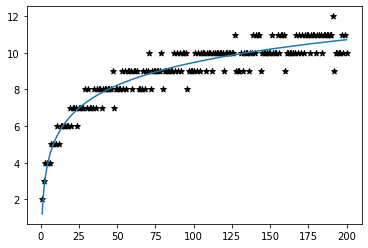

In [153]:

ln = []
lnx = []
lnx2 = []
lnxy = []
x = []
for i in range(1, 201):
    x.append(i)
    ln.append(len(index_alg(i)[0])) 
    lnx.append(math.log2(i))
    lnx2.append(math.log2(i) ** 2) 
    lnxy.append(ln[i - 1] * lnx[i - 1])

a = (201 * sum(lnxy) - sum(ln) * sum(lnx)) / (201 * sum(lnx2) - sum(lnx) ** 2)
b = (sum(ln) - a * sum(lnx)) / 200
y = [b + a * lnx[i - 1] for i in range(1, 201)]
plt.scatter(x, ln, color='black', marker='*')
plt.plot(x, y)
plt.show()

Методом наименьших квадратов мы смогли апроксимировать наши значения логорифмической функций.Это потверждает следствие из теоремы Брауэра.

4.**Проверка гипотезы Шольца–Брауэр**   $l'(2^n-1)\leq l'(n)+n-1$

Была написана функция для проверки данного утверждения.

In [159]:
def prov(n):
    sum = 0
    i = n
    l1 = len(index_alg(2 ** i - 1)[0])
    l2 = len(index_alg(i)[0]) + i - 1
    if(l1 <= l2):
        print("True")
prov(7)

True


Из-за экспаненциального  роста роста числа, практически проверить данное утверждения, для большого числа данных не представляется возмонжным. 
Теоретически было доказано, что для $n <= 64$ неравестно является равенством, и является верным для  $n <5784689$
Данную теорему можно использовать для улучшения алгоритмов, сразу находям минимальную длину цепочки.

## Вывод

В ходе выполнения практической работы были изучены и реализованы алгоритмы возведения числа в степень бинарный метод и метод множителей.
Были узучены алгоритмы построения аддитивной цепочки - алгоритм Яо и алгоритм дробления вектора индексов. Алгоритм Яо дает быстрые, но не идеальный вариант, а метод дробления вектора индексов переберает все варианты пока не найдет лучший.
Также были проверены следствие теоремы Брауэра и гипотеза Штольца-Брауэра.